# Data preparations

In [102]:
import pandas as pd

df = pd.read_csv("data/chinese_hashtags.csv")
df2 = pd.read_csv("data/hashtag_data/chinese_hashtags_august.csv")
ori_data = pd.concat([df, df2]).reset_index(drop=True)

# QUICK FIX
ori_data["hashtag"] = ori_data['hashtag'].str.replace("'.","")

ori_data

,created_at,id,hashtag
0,2020-05-20 07:46:38,11,#hubei
1,2020-05-20 07:46:38,11,#coronavirus
2,2020-05-20 07:47:09,12,#hubei
3,2020-05-20 07:47:09,12,#coronavirus
4,2020-05-20 07:54:16,13,#shanghaiinternationalfilmfestival
...,...,...,...
33478,2020-08-25 23:20:03,4955,#china
33479,2020-08-25 23:20:03,4955,#opinion
33480,2020-08-25 23:20:03,4955,#italy
33481,2020-08-25 23:40:03,4956,#covid19


In [103]:
ori_data["created_at"] = pd.to_datetime(ori_data["created_at"])
ori_data['just_date'] = ori_data['created_at'].dt.date
#df = df.rename(columns={"Unnamed: 0": "id", "hashtags_bytwitter": "hashtag"})
ori_data.head()

,created_at,id,hashtag,just_date
0,2020-05-20 07:46:38,11,#hubei,2020-05-20
1,2020-05-20 07:46:38,11,#coronavirus,2020-05-20
2,2020-05-20 07:47:09,12,#hubei,2020-05-20
3,2020-05-20 07:47:09,12,#coronavirus,2020-05-20
4,2020-05-20 07:54:16,13,#shanghaiinternationalfilmfestival,2020-05-20


In [104]:
per_date = ori_data[['just_date', 'id', 'hashtag']].groupby(['just_date', 'hashtag']).agg(['count']).reset_index()
per_date["hashtag_per_date"] = per_date["id"]["count"]
per_date = per_date[["just_date", "hashtag", "hashtag_per_date"]]
per_date = per_date.rename(columns={"hashtag": "Hashtag"})

per_date.head()

,just_date,Hashtag,hashtag_per_date
,,,
0,2020-05-20,#520withmewgulf,1
1,2020-05-20,#5g,1
2,2020-05-20,#animals,1
3,2020-05-20,#argentina,1
4,2020-05-20,#australia,2


# Co-occurring hashtag line plots over time

(0, 80)

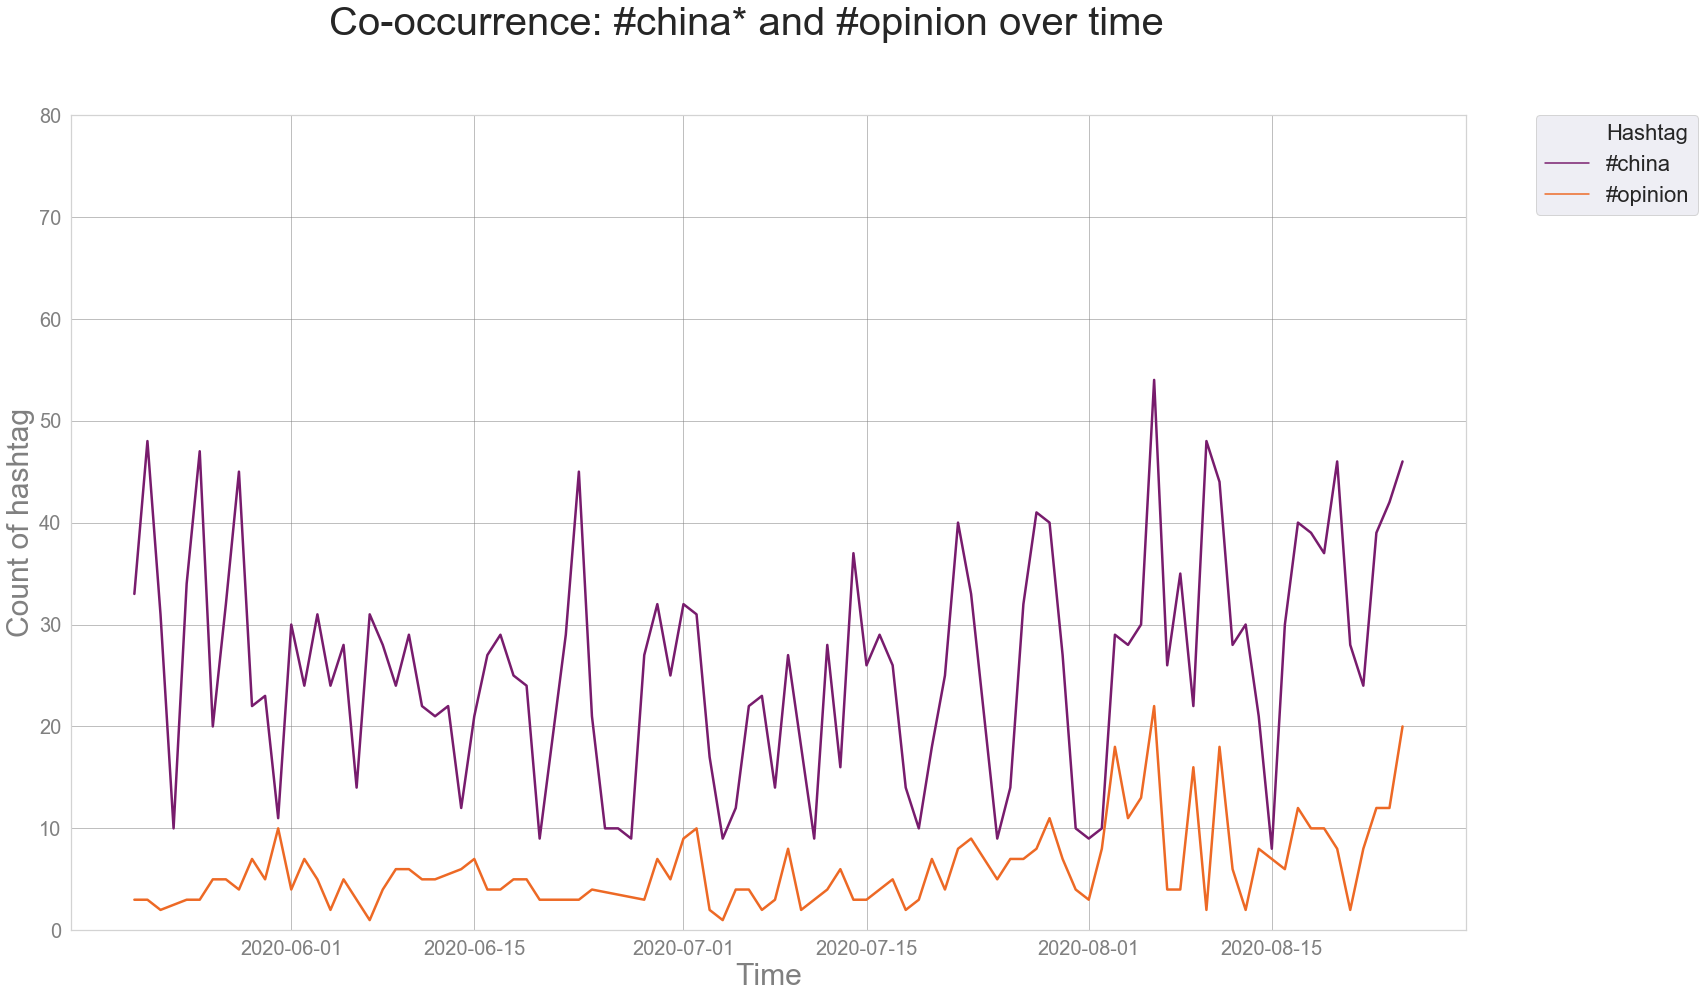

In [105]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import pyplot_themes as themes

df = per_date
df = df.loc[df['Hashtag'].isin(['#china', "#opinion"])]
nr_hash = len(df["Hashtag"].unique())

themes.theme_minimal(grid=False, ticks=False, fontsize=18)
a4_dims = (25,15) #(11.7, 8.27)

palette = sns.color_palette("inferno", nr_hash)


fig, ax = plt.subplots(figsize=a4_dims)
sns.set(font_scale = 2)

ax = sns.lineplot(x="just_date", y="hashtag_per_date", 
                  hue="Hashtag", style="Hashtag", 
                  markers = False, markersize = 10, 
                  dashes = False, 
                  palette = palette, 
                  linewidth = 2.5, data = df)

ax.set(xlabel="Time", ylabel = "Count of hashtag")
ax.xaxis.get_label().set_fontsize(30)
ax.yaxis.get_label().set_fontsize(30)
fig.suptitle('Co-occurrence: #china* and #opinion over time', fontsize=40)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax.grid(color='grey', linestyle='-', linewidth=0.5, which= "both")

plt.ylim(0, 80)

(0, 100)

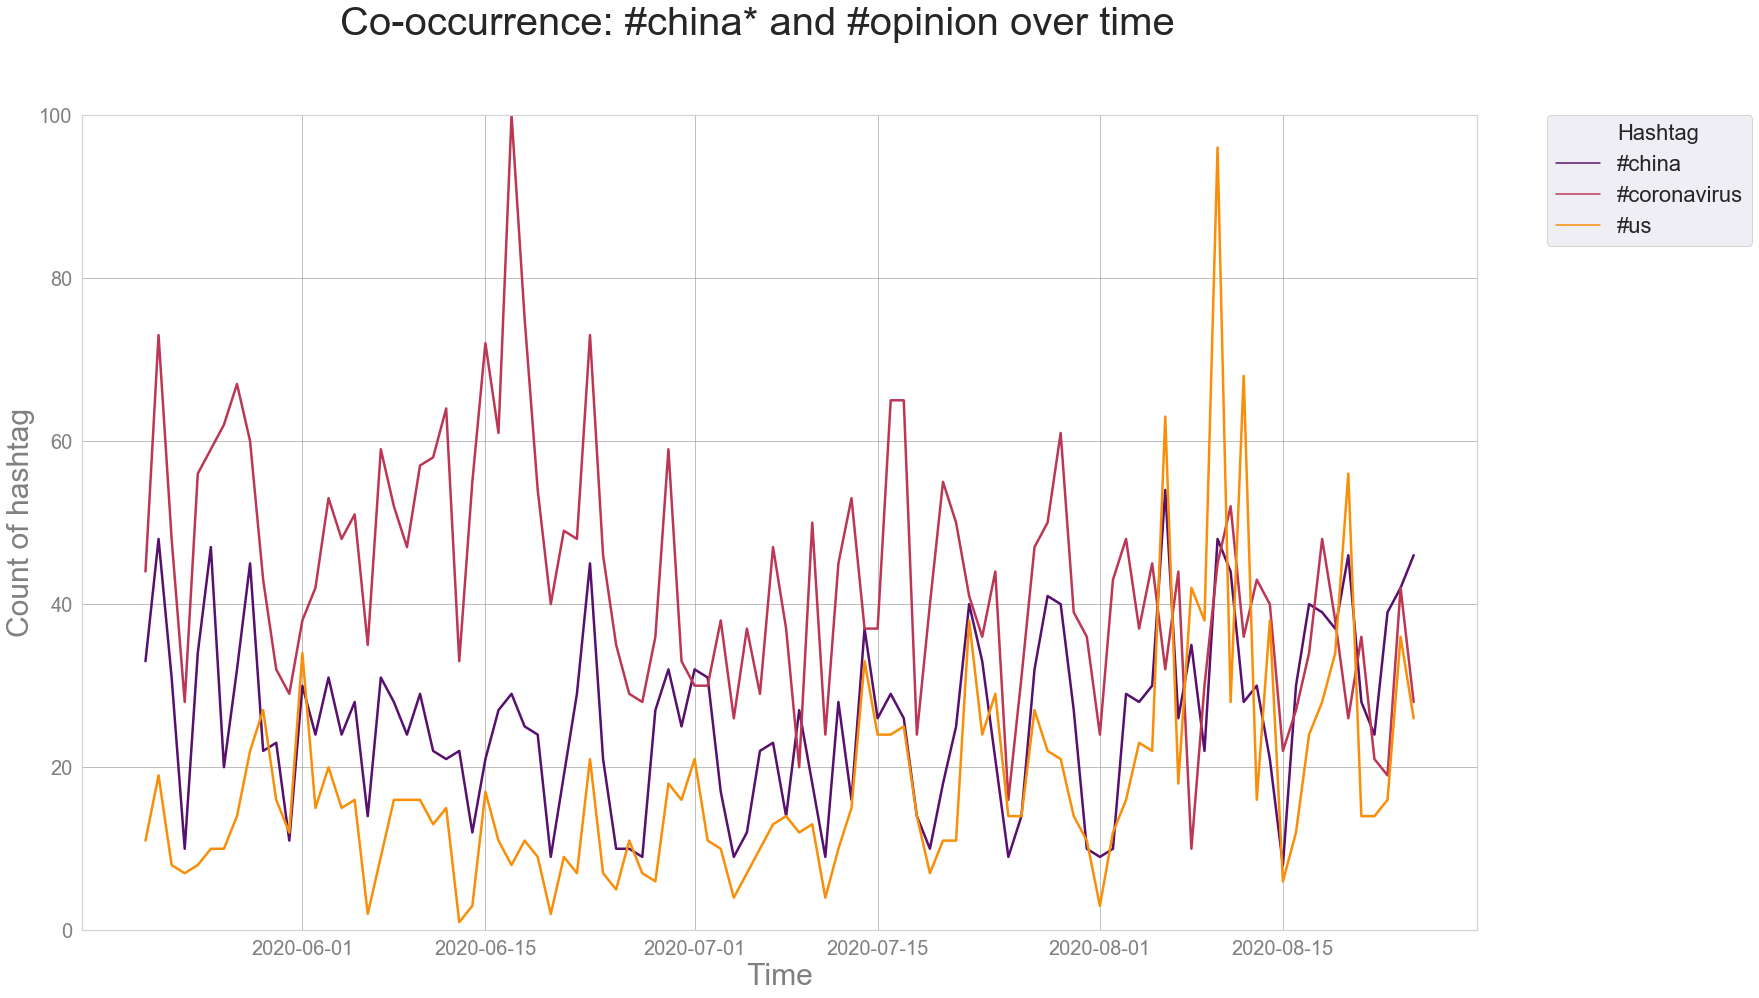

In [106]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import pyplot_themes as themes

df = per_date
df = df.loc[df['Hashtag'].isin(['#china', "#coronavirus", "#us"])]
nr_hash = len(df["Hashtag"].unique())

themes.theme_minimal(grid=False, ticks=False, fontsize=18)
a4_dims = (25,15) #(11.7, 8.27)

palette = sns.color_palette("inferno", nr_hash)


fig, ax = plt.subplots(figsize=a4_dims)
sns.set(font_scale = 2)

ax = sns.lineplot(x="just_date", y="hashtag_per_date", 
                  hue="Hashtag", style="Hashtag", 
                  markers = False, markersize = 10, 
                  dashes = False, 
                  palette = palette, 
                  linewidth = 2.5, data = df)

ax.set(xlabel="Time", ylabel = "Count of hashtag")
ax.xaxis.get_label().set_fontsize(30)
ax.yaxis.get_label().set_fontsize(30)
fig.suptitle('Co-occurrence: #china* and #opinion over time', fontsize=40)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax.grid(color='grey', linestyle='-', linewidth=0.5, which= "both")

plt.ylim(0, 100)

(0, 100)

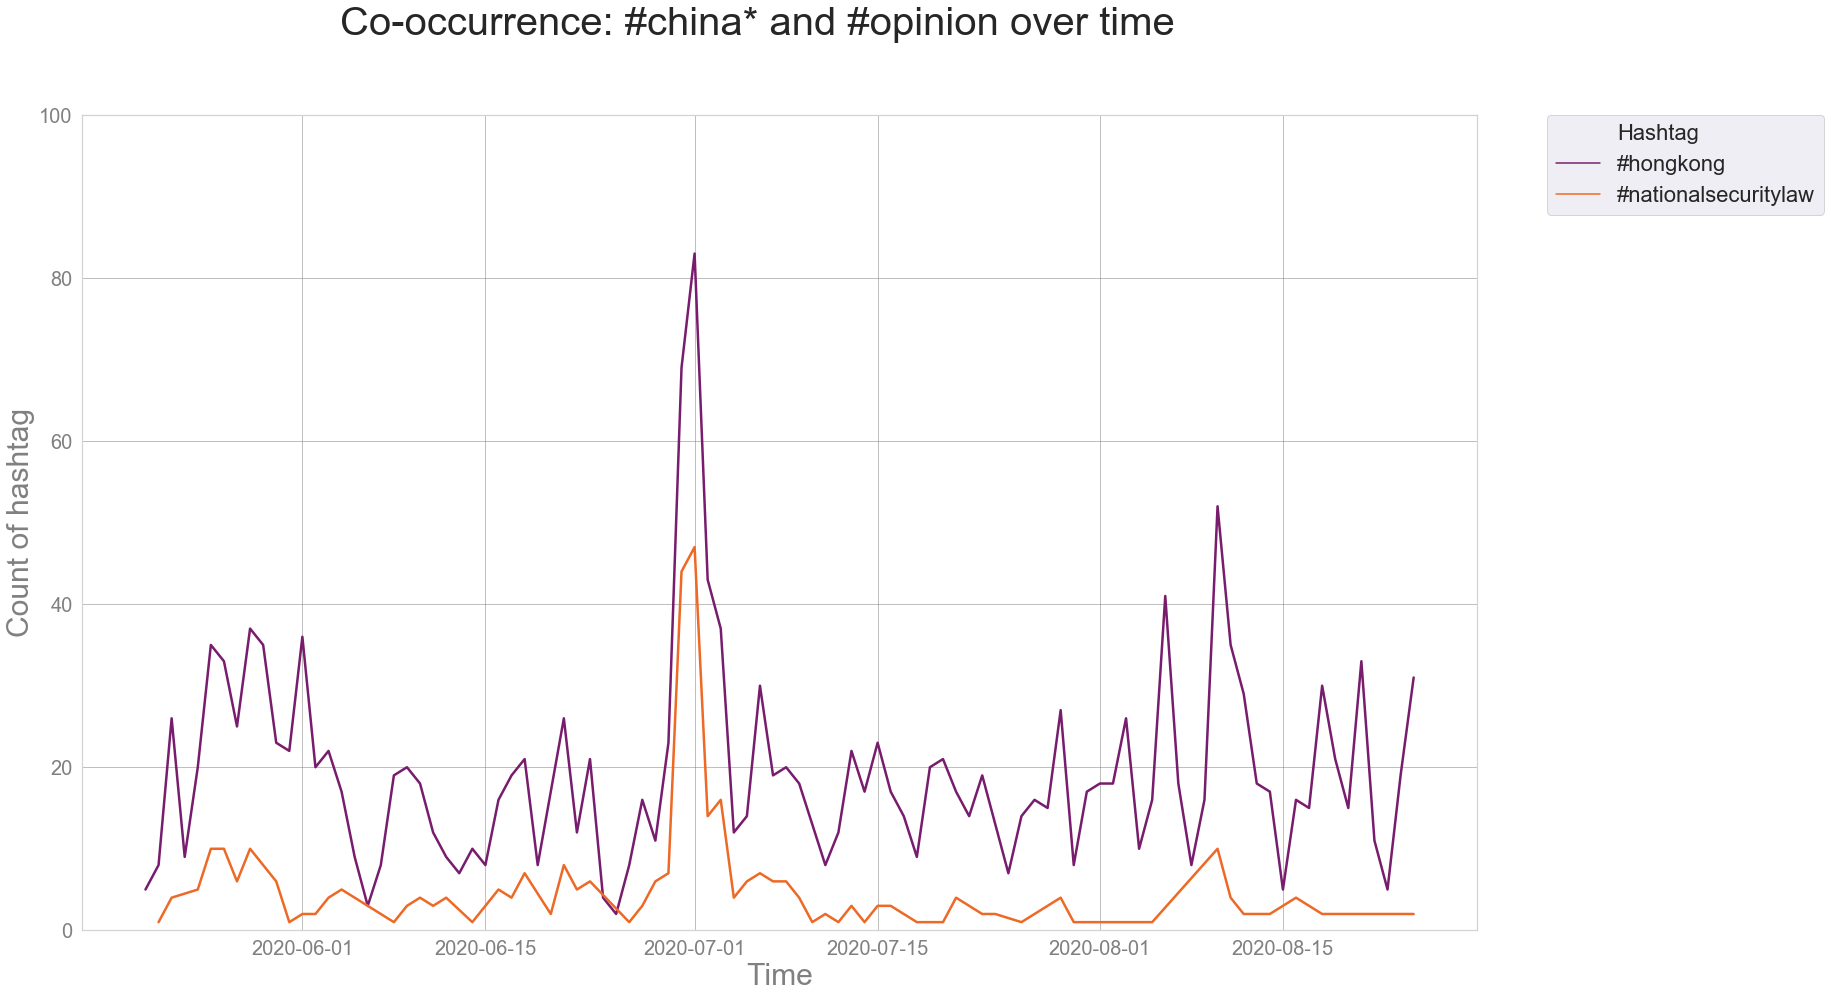

In [108]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import pyplot_themes as themes

df = per_date
df = df.loc[df['Hashtag'].isin(['#hongkong', "#nationalsecuritylaw"])]
nr_hash = len(df["Hashtag"].unique())

themes.theme_minimal(grid=False, ticks=False, fontsize=18)
a4_dims = (25,15) #(11.7, 8.27)

palette = sns.color_palette("inferno", nr_hash)


fig, ax = plt.subplots(figsize=a4_dims)
sns.set(font_scale = 2)

ax = sns.lineplot(x="just_date", y="hashtag_per_date", 
                  hue="Hashtag", style="Hashtag", 
                  markers = False, markersize = 10, 
                  dashes = False, 
                  palette = palette, 
                  linewidth = 2.5, data = df)

ax.set(xlabel="Time", ylabel = "Count of hashtag")
ax.xaxis.get_label().set_fontsize(30)
ax.yaxis.get_label().set_fontsize(30)
fig.suptitle('Co-occurrence: #china* and #opinion over time', fontsize=40)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax.grid(color='grey', linestyle='-', linewidth=0.5, which= "both")

plt.ylim(0, 100)

# Most frequent hashtags

In [109]:
freq_data = per_date.groupby(['Hashtag']).sum().reset_index().rename(columns={"hashtag_per_date": "count"})

C:\Users\maris\AppData\Local\R-MINI~1\envs\chcaa_env_2\lib\site-packages\pandas\core\generic.py:3878: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]), <a list of 40 Text yticklabel objects>)

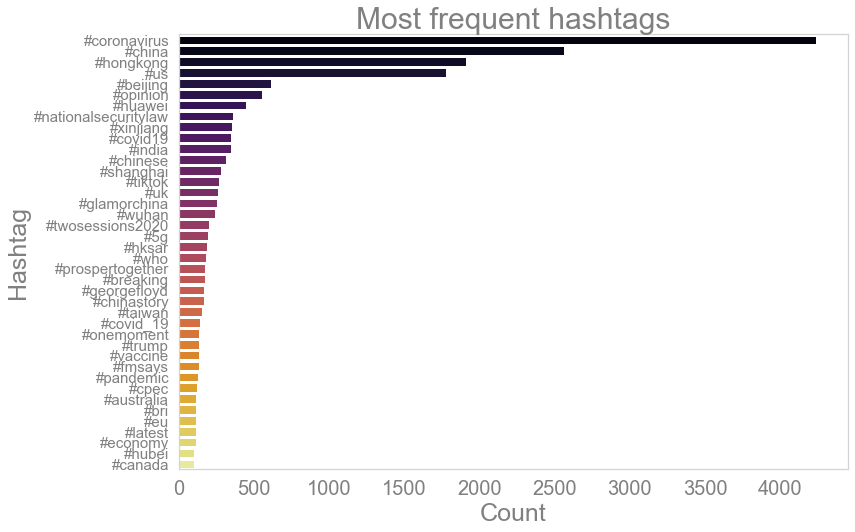

In [110]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import pyplot_themes as themes

freq_data = freq_data.sort_values(by=['count'], ascending=False).reset_index(drop=False)

df = freq_data
df = df[df["count"] > 100]
nr_hash = len(df["Hashtag"].unique())

themes.theme_minimal(grid=False, ticks=False, fontsize=18)
palette = sns.color_palette("inferno", nr_hash)

ax = sns.barplot(y="Hashtag", x="count", palette = palette, data = df)

ax.set(xlabel="Count", ylabel = "Hashtag")
ax.xaxis.get_label().set_fontsize(25)
ax.yaxis.get_label().set_fontsize(25)
ax.axes.set_title("Most frequent hashtags",fontsize=30)

plt.xticks(fontsize=20)
plt.yticks(fontsize=15)

# Top hashtags over time

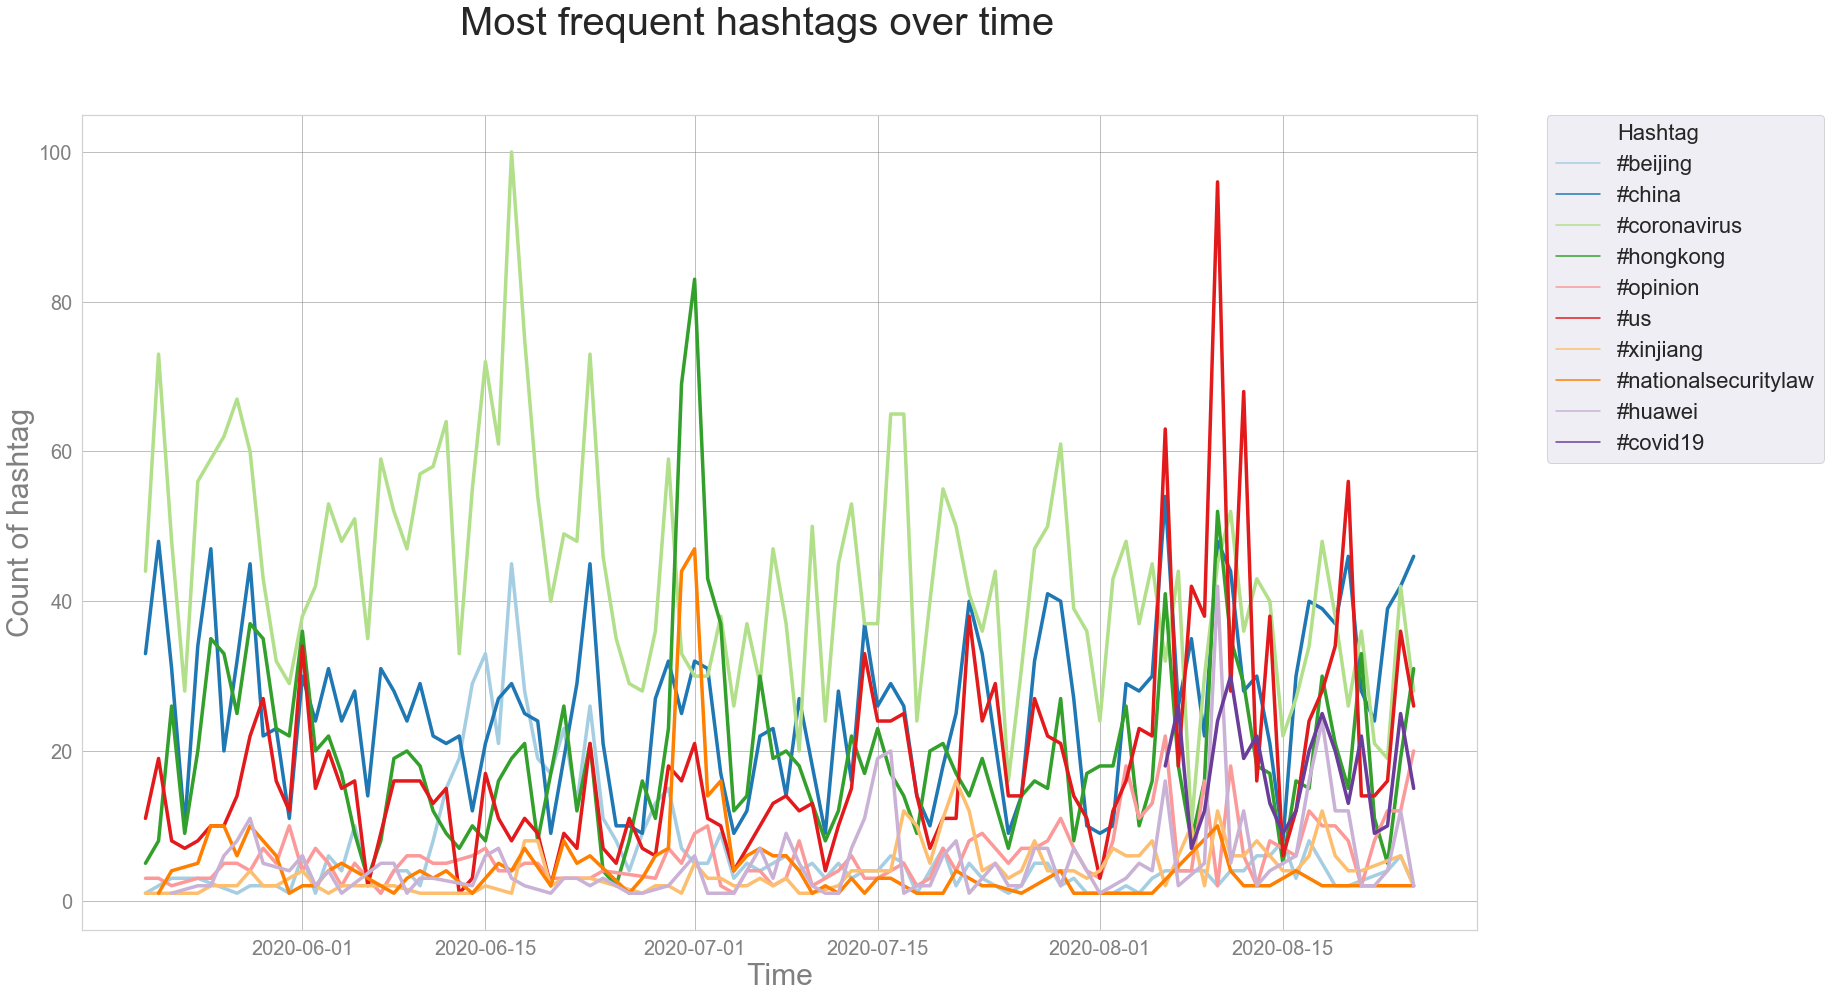

In [111]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import pyplot_themes as themes

df = per_date
df = df.loc[df['Hashtag'].isin(list(freq_data["Hashtag"][0:10]))]
nr_hash = len(df["Hashtag"].unique())

themes.theme_minimal(grid=False, ticks=False, fontsize=18)
a4_dims = (25,15) #(11.7, 8.27)

palette = sns.color_palette("Paired", nr_hash)

filled_markers = ["^", "o", "h"] + ["h"]*(nr_hash-3)

fig, ax = plt.subplots(figsize=a4_dims)
sns.set(font_scale = 2)
ax = sns.lineplot(x="just_date", y="hashtag_per_date", hue="Hashtag", style="Hashtag", 
                  markers = False, markersize = 10, dashes = False, palette = palette, linewidth = 3.5, data = df)
ax.set(xlabel="Time", ylabel = "Count of hashtag")
ax.xaxis.get_label().set_fontsize(30)
ax.yaxis.get_label().set_fontsize(30)
fig.suptitle('Most frequent hashtags over time', fontsize=40)


plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax.grid(color='grey', linestyle='-', linewidth=0.5, which= "both")
#ax.set_facecolor("xkcd:silver")
#plt.ylim(0, 100)

In [112]:
df[df["Hashtag"] == "#china"]

,just_date,Hashtag,hashtag_per_date
,,,
16,2020-05-20,#china,33
131,2020-05-21,#china,48
284,2020-05-22,#china,31
395,2020-05-23,#china,10
456,2020-05-24,#china,34
...,...,...,...
11920,2020-08-21,#china,28
12000,2020-08-22,#china,24
12080,2020-08-23,#china,39
